# Phase 1 : Veille et exploration théorique

Validation croisée (cross-validation)

**1. Concepts de base**

*Qu’est-ce que la validation croisée et pourquoi est-elle importante ?*

La validation croisée est une technique utilisée pour évaluer la performance d’un modèle en le testant sur plusieurs sous-ensembles de données. Elle permet de mieux généraliser les résultats en comparant les performances sur des données non vues et réduit le risque de surapprentissage ou de sous-apprentissage.

*Différence entre validation simple (train/test split) et validation croisée :*

 - Validation simple : Divise les données en deux ensembles (entraînement et test). Cela peut mener à des biais si l'échantillon est petit ou non représentatif.
 - Validation croisée : Divise les données en plusieurs sous-ensembles (ou folds), entraîne le modèle sur certains et le teste sur d’autres, pour obtenir une évaluation plus robuste.

**2. Types de validation croisée**

*Différences entre les techniques :*

 - k-fold cross-validation : Divise les données en k sous-ensembles égaux. Chaque sous-ensemble sert une fois de test, et les autres de train.
 - Leave-One-Out Cross-Validation (LOOCV) : Cas particulier de k-fold où k est égal à la taille des données. Chaque observation est tour à tour utilisée comme ensemble de test.
 - Stratified k-fold cross-validation : Variante du k-fold qui maintient la proportion des classes dans chaque pli, utile pour les ensembles déséquilibrés.
 - Quand utiliser stratified k-fold ? Lorsque les classes sont déséquilibrées, le stratified k-fold assure une meilleure représentativité des classes dans chaque pli.

**3. Applications et limites**

*Avantages et inconvénients pour les données déséquilibrées :*
 - Avantages : Assure que toutes les classes sont bien représentées dans les données d’entraînement et de test.
 - Inconvénients : Peut devenir coûteux en temps de calcul sur de grands ensembles de données.

*Comment la validation croisée évite le surapprentissage ?*
En testant le modèle sur plusieurs sous-ensembles non vus, elle détecte si un modèle est trop spécifique aux données d’entraînement.

**4. Métriques et résultats**

Score moyen lors d’une validation croisée : Il représente la performance moyenne du modèle sur tous les plis, donnant une évaluation générale de ses capacités de généralisation.

**Interprétation de la variance des scores entre les plis :**

 - Faible variance : Le modèle est robuste et généralise bien.
 - Forte variance : Les performances varient beaucoup selon les sous-ensembles, indiquant une possible instabilité du modèle ou une mauvaise représentativité des données.

**Optimisation des hyperparamètres (GridSearchCV et RandomizedSearchCV)**

**1. Concepts de base**

*Différence entre paramètres et hyperparamètres :*

 - Paramètres : Déterminés par l’apprentissage, comme les poids dans une régression linéaire.
 - Hyperparamètres : Définis avant l’entraînement, comme le taux d’apprentissage ou la profondeur d’un arbre de décision.

*Pourquoi les hyperparamètres nécessitent-ils une optimisation séparée ?*
Ils ne sont pas appris directement, mais influencent le processus d’apprentissage et doivent être ajustés pour maximiser la performance du modèle.

**2. Approches d’optimisation**

Fonctionnement de GridSearchCV : Explore toutes les combinaisons possibles d’hyperparamètres dans un espace défini.
 - Avantages : Explore exhaustivement toutes les options.
 - Inconvénients : Coûteux en temps et en calcul.

Différences avec RandomizedSearchCV : RandomizedSearchCV échantillonne un nombre défini de combinaisons aléatoires.
 - Avantages : Plus rapide pour les espaces de recherche larges.
 - Cas préférés : Lorsque le coût computationnel est élevé ou si certaines dimensions de l’espace sont moins critiques.

*Facteurs influençant le choix de la méthode :*
 - Taille des données.
 - Complexité du modèle.
 - Ressources computationnelles disponibles.

**3. Configuration et choix**

Paramètre cv dans GridSearchCV : Définit le type de validation croisée (par exemple, k-fold). Il est critique pour garantir une évaluation robuste.

Choix des hyperparamètres et plages de valeurs : 
Basé sur :
 - La connaissance du modèle (ex. : C dans une SVM pour régularisation).
 - Des tests exploratoires pour limiter les plages.

**4. Problèmes courants**

*Risques d’une mauvaise configuration dans GridSearchCV :*
 - Sur-apprentissage si le même ensemble est utilisé pour la sélection d’hyperparamètres et l’évaluation finale.
 - Temps de calcul excessif avec trop de combinaisons.

*Data leakage :*
 - Définition : Informations des données de test influencent les données d’entraînement.
 - Prévention : Appliquer la validation croisée de manière rigoureuse sans utiliser les données de test pour ajuster les hyperparamètres.

**5. Métriques et performance**

Évaluation des modèles optimisés : Utiliser des données de test séparées pour évaluer la performance après optimisation.
Choix de métriques spécifiques :
 - Accuracy : Pour les données équilibrées.
 - F1-score : Pour les ensembles déséquilibrés, car il équilibre précision et rappel.

# Phase 2 : Compréhension et exploration des données 
Examiner la structure et les caractéristiques principales des données.

**Structures des données**

In [2]:

import pandas as pd

# Charger le fichier CSV pour en examiner les premières lignes et obtenir un aperçu général.
file_path = 'Loan_data.csv'

# Charger les données
data = pd.read_csv(file_path)

# Afficher un aperçu des données
data_info = {
    "head": data.head(),
    "info": data.info(),
    "description": data.describe(include="all")
}
data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


{'head':     Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001002   Male      No          0      Graduate            No   
 1  LP001003   Male     Yes          1      Graduate            No   
 2  LP001005   Male     Yes          0      Graduate           Yes   
 3  LP001006   Male     Yes          0  Not Graduate            No   
 4  LP001008   Male      No          0      Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0         NaN             360.0   
 1             4583             1508.0       128.0             360.0   
 2             3000                0.0        66.0             360.0   
 3             2583             2358.0       120.0             360.0   
 4             6000                0.0       141.0             360.0   
 
    Credit_History Property_Area Loan_Status  
 0             1.0         Urban           Y  
 1             1.0         Rural          

**Structure des données**

Nombre total d'entrées : 981
Nombre de colonnes : 13

**Colonnes principales :**
 - Loan_ID : Identifiant unique de chaque prêt.
 - Gender, Married, Dependents, Education, Self_Employed : Caractéristiques démographiques.
 - ApplicantIncome, CoapplicantIncome : Revenus des demandeurs.
 - LoanAmount, Loan_Amount_Term : Montant et durée du prêt.
 - Credit_History : Historique de crédit (1.0 = bon, 0.0 = mauvais).
 - Property_Area : Type de zone (Rural, Urban, Semiurban).
 - Loan_Status : Statut du prêt (cible à prédire : Y = accordé, N = refusé).

**Problèmes identifiés :**

 - Valeurs manquantes :
Colonnes concernées : Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History, et Loan_Status.

- Types de données :
Les colonnes catégoriques comme Gender ou Married doivent être encodées pour les modèles de machine learning.

 - Colonnes inutiles pour l'entraînement :
Loan_ID semble être une colonne d'identification et n’apporte pas d’information prédictive.

**Exploration des données**

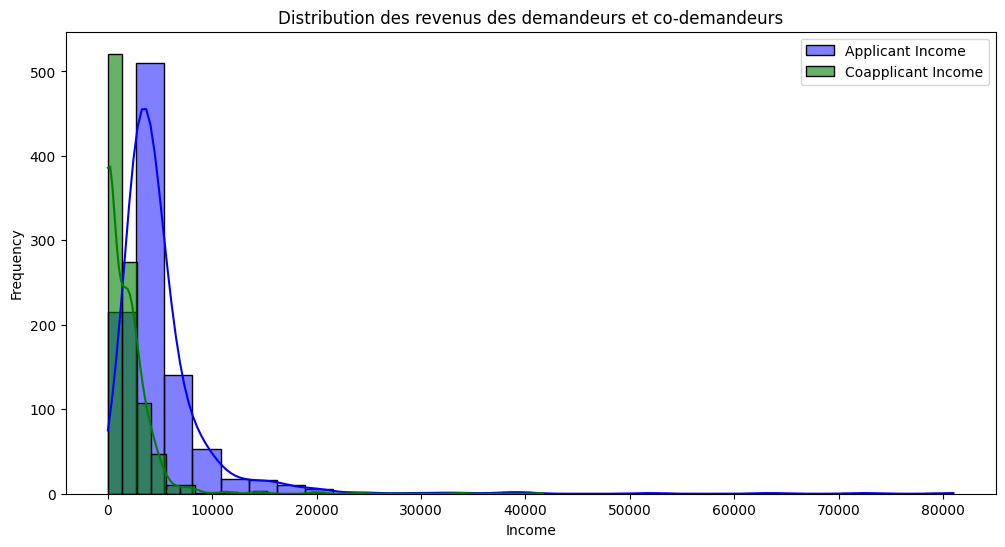

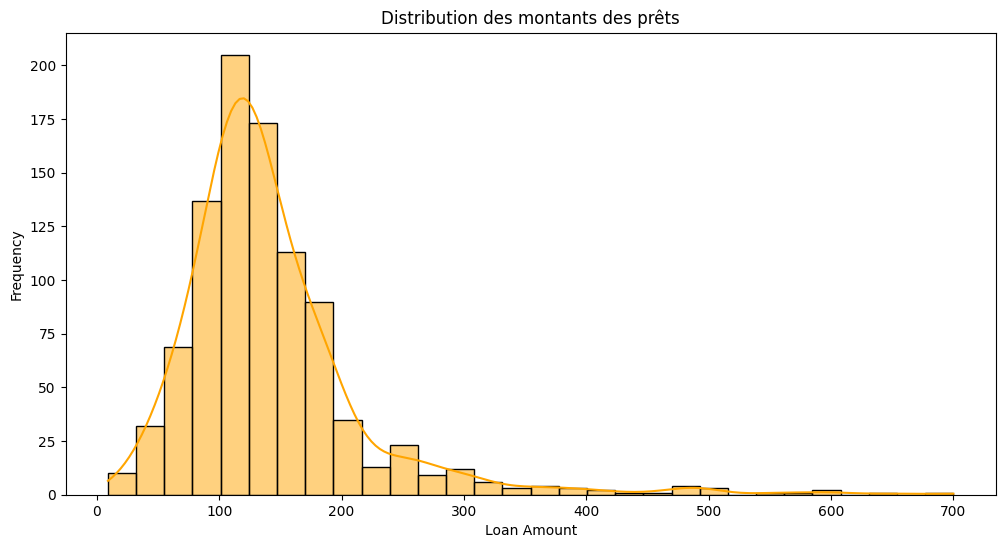

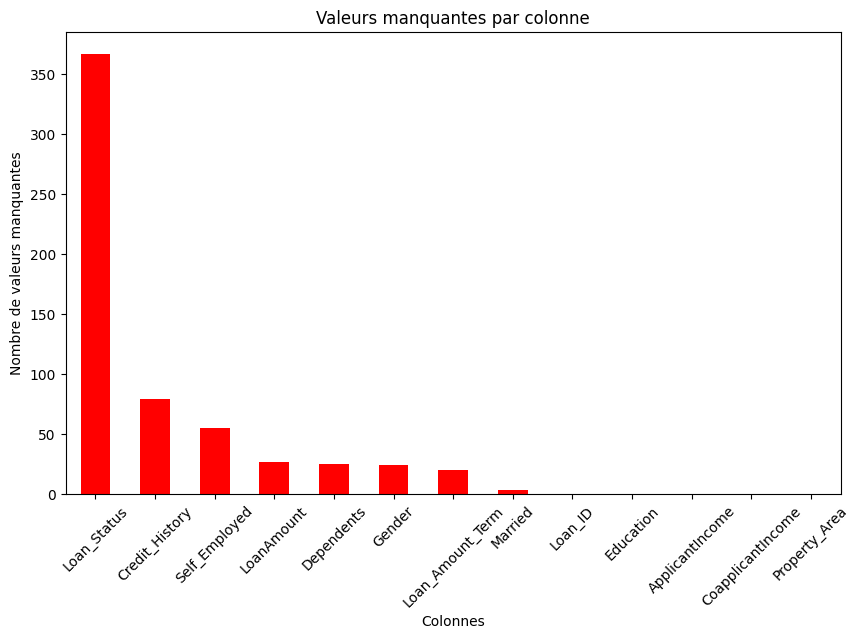

(       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 count       981.000000         981.000000  954.000000        961.000000   
 mean       5179.795107        1601.916330  142.511530        342.201873   
 std        5695.104533        2718.772806   77.421743         65.100602   
 min           0.000000           0.000000    9.000000          6.000000   
 25%        2875.000000           0.000000  100.000000        360.000000   
 50%        3800.000000        1110.000000  126.000000        360.000000   
 75%        5516.000000        2365.000000  162.000000        360.000000   
 max       81000.000000       41667.000000  700.000000        480.000000   
 
        Credit_History  
 count      902.000000  
 mean         0.835920  
 std          0.370553  
 min          0.000000  
 25%          1.000000  
 50%          1.000000  
 75%          1.000000  
 max          1.000000  ,
 Loan_Status          367
 Credit_History        79
 Self_Employed         55
 LoanAmoun

In [3]:
# Résumé statistique des colonnes numériques
numeric_summary = data.describe()

# Analyse des valeurs manquantes
missing_values = data.isnull().sum().sort_values(ascending=False)

# Distribution des variables cibles (Loan_Status)
loan_status_distribution = data['Loan_Status'].value_counts()

# Visualisation de la distribution des revenus des demandeurs et co-demandeurs
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(data['ApplicantIncome'], bins=30, kde=True, color='blue', label='Applicant Income')
sns.histplot(data['CoapplicantIncome'], bins=30, kde=True, color='green', label='Coapplicant Income', alpha=0.6)
plt.legend()
plt.title('Distribution des revenus des demandeurs et co-demandeurs')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Visualisation des montants de prêt
plt.figure(figsize=(12, 6))
sns.histplot(data['LoanAmount'], bins=30, kde=True, color='orange')
plt.title('Distribution des montants des prêts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Visualisation des valeurs manquantes
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='red')
plt.title('Valeurs manquantes par colonne')
plt.ylabel('Nombre de valeurs manquantes')
plt.xlabel('Colonnes')
plt.xticks(rotation=45)
plt.show()

# Résumé des analyses
numeric_summary, missing_values, loan_status_distribution


**Résultats de l'exploration :**

**1. Résumé statistique des données numériques :**

-  *Revenu des demandeurs :*
Moyenne : 5179.80
Écart-type : 5695.10 (indique une grande variabilité).
Minimum : 0 (indique des données possiblement aberrantes).
Maximum : 81000.

- *Montants des prêts :*
Moyenne : 142.51 (en milliers ?).
Valeurs extrêmes : Minimum 9, Maximum 700.
Données manquantes : 27.

- *Historique de crédit :*
Moyenne : 0.835 (1 = historique positif).
Données manquantes : 79.

**2. Valeurs manquantes par colonne :**

Les colonnes avec des valeurs manquantes les plus significatives sont :
- Loan_Status (cible) : 367 valeurs manquantes.
- Credit_History : 79.
- Self_Employed : 55.
- LoanAmount : 27.

**3. Distribution de la variable cible (Loan_Status) :**

- Prêts approuvés (Y) : 422.
- Prêts refusés (N) : 192.
- Déséquilibre dans la distribution.

**4. Visualisations :**

- *Revenus des demandeurs :*

Distribution asymétrique avec plusieurs valeurs élevées (outliers).
Les revenus des co-demandeurs sont souvent faibles ou nuls.

- *Montants des prêts :*

Distribution concentrée entre 100 et 200.

- *Valeurs manquantes :*

Certaines colonnes critiques, comme Credit_History, nécessitent une gestion soignée.

**Phase 3 : Prétraitement des données :**
 - Nettoyer et transformer les données pour préparer un jeu propre et utilisable. 
 - Identifier les données qui vous serviront à prédire l'éligibilité des clients aux crédits et qui ne sont pas à inclure dans les données d'entrainements et de test.